# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

In [4]:
#Create empty lists for dataframe
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url='http://api.openweathermap.org/data/2.5/weather?'
ticker=1
print('Beginning Data Retrieval')

for x in cities:
    print(f"Processing Record {ticker} | {x}")
    query= url + "appid=" + weather_api_key + "&q=" + x
    response=requests.get(query).json()
    try:    
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country']) 
        date.append(response['dt'])
        ticker+=1
    except:
        print("City not found!")
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        windspeed.append(None)
        country.append(None) 
        date.append(None)
        ticker+=1
        pass

Beginning Data Retrieval
Processing Record 1 | trelew
Processing Record 2 | talnakh
Processing Record 3 | mys shmidta
City not found!
Processing Record 4 | grindavik
Processing Record 5 | port elizabeth
Processing Record 6 | vila franca do campo
Processing Record 7 | castro
Processing Record 8 | srednekolymsk
Processing Record 9 | kapaa
Processing Record 10 | berdigestyakh
Processing Record 11 | saskylakh
Processing Record 12 | sorkjosen
Processing Record 13 | punta arenas
Processing Record 14 | airai
Processing Record 15 | saint george
Processing Record 16 | ushuaia
Processing Record 17 | kakonko
Processing Record 18 | east london
Processing Record 19 | victoria
Processing Record 20 | atuona
Processing Record 21 | bredasdorp
Processing Record 22 | katsuura
Processing Record 23 | qaanaaq
Processing Record 24 | rikitea
Processing Record 25 | kharp
Processing Record 26 | busselton
Processing Record 27 | nikolskoye
Processing Record 28 | barbar
City not found!
Processing Record 29 | taola

Processing Record 235 | nouakchott
Processing Record 236 | cherskiy
Processing Record 237 | sabha
Processing Record 238 | avarua
Processing Record 239 | yumen
Processing Record 240 | carnarvon
Processing Record 241 | ambon
Processing Record 242 | lagoa
Processing Record 243 | san cristobal
Processing Record 244 | pingyi
Processing Record 245 | san quintin
Processing Record 246 | shahreza
Processing Record 247 | shimoda
Processing Record 248 | san juan
Processing Record 249 | balozi
Processing Record 250 | selje
Processing Record 251 | fortuna
Processing Record 252 | vaitupu
City not found!
Processing Record 253 | warrnambool
Processing Record 254 | coffs harbour
Processing Record 255 | masuda
Processing Record 256 | natal
Processing Record 257 | road town
Processing Record 258 | torbay
Processing Record 259 | half moon bay
Processing Record 260 | north myrtle beach
Processing Record 261 | imbituba
Processing Record 262 | tabiauea
City not found!
Processing Record 263 | zhanatas
City no

Processing Record 477 | khonuu
City not found!
Processing Record 478 | porto novo
Processing Record 479 | tefe
Processing Record 480 | kasongo-lunda
Processing Record 481 | kirakira
Processing Record 482 | novaya igirma
Processing Record 483 | sobolevo
Processing Record 484 | luyang
Processing Record 485 | barra patuca
Processing Record 486 | bolungarvik
City not found!
Processing Record 487 | piacabucu
Processing Record 488 | kampot
Processing Record 489 | coahuayana
Processing Record 490 | bud
Processing Record 491 | safwah
City not found!
Processing Record 492 | gat
Processing Record 493 | vestmannaeyjar
Processing Record 494 | port macquarie
Processing Record 495 | nurota
Processing Record 496 | tapah
Processing Record 497 | el wasta
City not found!
Processing Record 498 | bandarbeyla
Processing Record 499 | saint marys
Processing Record 500 | taree
Processing Record 501 | santiago del estero
Processing Record 502 | sur
Processing Record 503 | sola
Processing Record 504 | sorland
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:
cities_df=pd.DataFrame({
                        'Cities':cities,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':max_temp,
                        'Humidity':humidity,
                        'Cloudiness':cloudiness,
                        'Windspeed':windspeed,
                        'Country':country,
                        'Date':date
                        })
cities_df=cities_df.dropna()
cities_df['Max Temp']=(cities_df['Max Temp']*9/5)-459.67
cities_df.to_csv('../output_data/cities_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
#cities_df.loc[cities_df['Humidity']>100]
print('0 cities found with humidity > 100')

0 cities found with humidity > 100


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

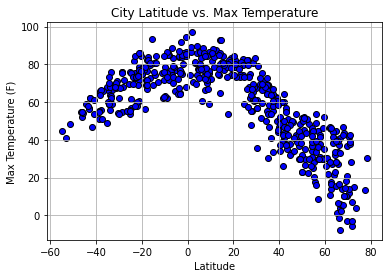

In [58]:
x=cities_df['Lat']
y=cities_df['Max Temp']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.savefig('../output_data/plot1.png')
plt.show()

The Latitude vs. Temperature plot clearly shows that when the latitude's absolute distance from 0 increases, the temperature drops. The highest temperatures are seen at 0 degrees latitude and the lowest temperatures are seen around 80 degrees latitude. 

## Latitude vs. Humidity Plot

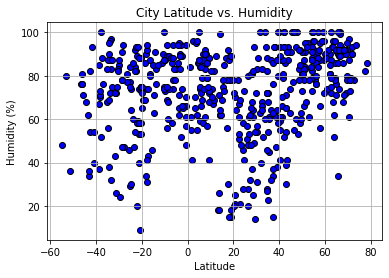

In [57]:
x=cities_df['Lat']
y=cities_df['Humidity']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.savefig('../output_data/plot2.png')
plt.show()

There is a small gap in low humidity between -20 and 20 degrees latitude, but it is unclear if that is a significant correlation. Other than that, there does not seem to be any clear correlation between city latitude and humidity.

## Latitude vs. Cloudiness Plot

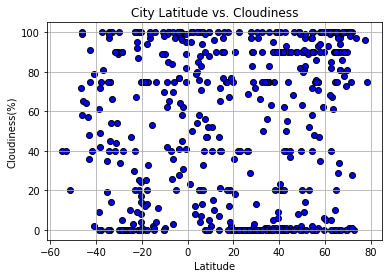

In [59]:
x=cities_df['Lat']
y=cities_df['Cloudiness']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.savefig('../output_data/plot3.png')
plt.show()

There is a small gap in low cloudiness between -10 and 10 degrees latitude, but it is unclear if that is a significant correlation. Other than that, there does not seem to be any clear correlation between city latitude and cloudiness.

## Latitude vs. Wind Speed Plot

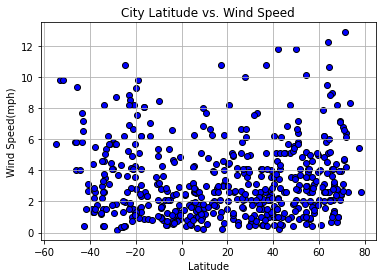

In [60]:
x=cities_df['Lat']
y=cities_df['Windspeed']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.savefig('../output_data/plot4.png')
plt.show()

There does not appear to be any clear correlation between latitude and wind speed.

## Linear Regression

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8802666756985398


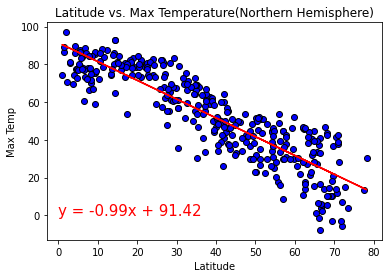

In [61]:
north_hem=cities_df.loc[cities_df['Lat']>0]
x=north_hem['Lat']
y=north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature(Northern Hemisphere)')
plt.annotate(equation,(0,0),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot5.png')
plt.show()

With an r-value of -0.88 we can tell that there is a very strong negative correlation between latitude and max temperature in the northern hemisphere.  The further North a city is from the equator, the lower its max temperature is likely to be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.707547848341285


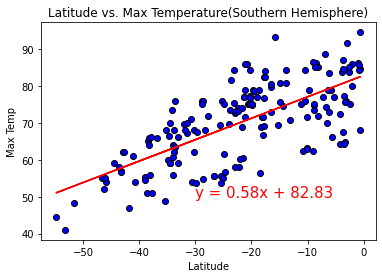

In [62]:
south_hem=cities_df.loc[cities_df['Lat']<0]
x=south_hem['Lat']
y=south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature(Southern Hemisphere)')
plt.annotate(equation,(-30,50),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot6.png')
plt.show()

With an r-value of 0.7, there is a strong positive correlation between latitude and max temperature in the southern hemisphere. The further south a city is from the equator, the lower its max temperature is likely to be, however not to the same extent as in the northern hemisphere. The explanation for the difference between the North and South hemispheres here may be that there are fewer cities as far south of the equator as there are north of the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33031590066866234


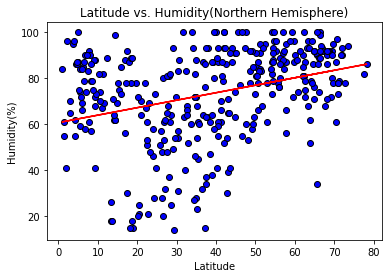

In [63]:
north_hem=cities_df.loc[cities_df['Lat']>0]
x=north_hem['Lat']
y=north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude vs. Humidity(Northern Hemisphere)')
plt.annotate(equation,(0,0),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot7.png')
plt.show()

With an r-value of 0.33, there is a weak positive linear relationship between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17484530431271214


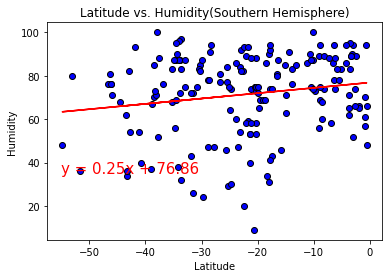

In [64]:
south_hem=cities_df.loc[cities_df['Lat']<0]
x=south_hem['Lat']
y=south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity(Southern Hemisphere)')
plt.annotate(equation,(-55,35),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot8.png')
plt.show()

With an r-value of .17, there is no significant measurable relationship between latitude and humidity in the southern hemisphere.  The explanation for the difference between the North and South hemispheres here may be that there are fewer cities as far south of the equator as there are north of the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.20564493286591054


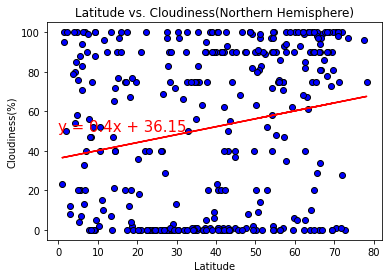

In [65]:
north_hem=cities_df.loc[cities_df['Lat']>0]
x=north_hem['Lat']
y=north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs. Cloudiness(Northern Hemisphere)')
plt.annotate(equation,(0,50),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot9.png')
plt.show()

There is no significant correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12825831165275844


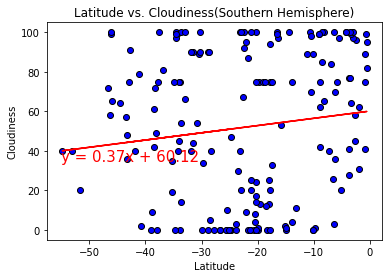

In [66]:
south_hem=cities_df.loc[cities_df['Lat']<0]
x=south_hem['Lat']
y=south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness(Southern Hemisphere)')
plt.annotate(equation,(-55,35),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot10.png')
plt.show()

There is no significant correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22113513103346455


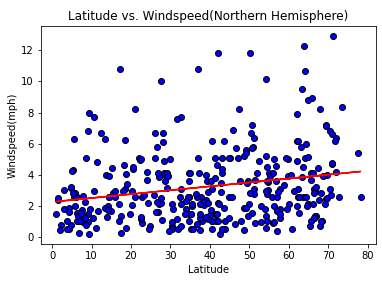

In [67]:
north_hem=cities_df.loc[cities_df['Lat']>0]
x=north_hem['Lat']
y=north_hem['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Windspeed(mph)')
plt.title('Latitude vs. Windspeed(Northern Hemisphere)')
plt.annotate(equation,(0,14),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot11.png')
plt.show()

R-value of 0.22 indicates that there is no significant correlation between latitude and windspeed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3049671964342332


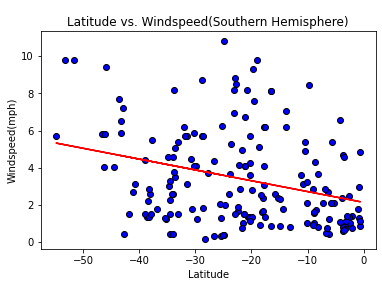

In [68]:
south_hem=cities_df.loc[cities_df['Lat']<0]
x=south_hem['Lat']
y=south_hem['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Windspeed(mph)')
plt.title('Latitude vs. Windspeed(Southern Hemisphere)')
plt.annotate(equation,(-50,12),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.savefig('../output_data/plot12.png')
plt.show()

R-value of 0.28 indicates that there is no significant correlation between latitude and windspeed in the southern hemisphere.